In [0]:
import networkx as nx;
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;
import math;

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
#Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [0]:
def getSampleSize(size):
  if size >= 2000:
    return 5
  elif size >= 1000:
    return 10
  elif size >= 500:
    return 20
  elif size >= 200:
    return 30
  else: 
    return 50

In [0]:
def calc_chi_and_S(network):
    _network_N = network.number_of_nodes();
    _comps = nx.connected_components(network);
    _comp_sizes = [len(_comp) for _comp in _comps];
    _sort_c_sizes = sorted(_comp_sizes,reverse=True);
    _lcs = _sort_c_sizes[0]/_network_N;
    _chi = 0;
    if len(_sort_c_sizes) > 1:
        _chi = sum([_sort_c_sizes[i]*_sort_c_sizes[i] for i in range(1,len(_sort_c_sizes))]);
        return _chi/(len(_sort_c_sizes)),_lcs;
    else:
        return _chi,_lcs;

In [0]:
x, y, z, z2 = [],[],[], [];
x.clear(); #hold p values
y.clear(); #hold N values
z.clear(); #hold S values
z2.clear(); #hold chi values
num_samp = 100;
delta = 0.005;
size_list = list(range(1000, 3000, 100));#list(range(10, 500, 5)) #+ list(range(500, 1000, 50)) + list(range(1000, 10100, 100));
for size in size_list:
  num_p_samp = 150
  p_list = np.linspace(1/(size-1)-delta, 1/(size-1)+delta, num_p_samp);
  x.append(list(p_list))
  y.append([size]*num_p_samp)
  s_list = [];
  s_list.clear();
  chi_list = [];
  chi_list.clear();
  for p in p_list:
      S_values = [];
      S_values.clear();
      chi_values =[];
      chi_values.clear();
      num_samp = getSampleSize(size);
      for i in range(0,num_samp):
          ER_graph = nx.generators.erdos_renyi_graph(size,p);
          chi,S = calc_chi_and_S(ER_graph);
          S_values.append(S);
          chi_values.append(chi);
      s_list.append(np.mean(S_values));
      chi_list.append(np.mean(chi_values));
  z.append(s_list)
  z2.append(chi_list)

<Figure size 432x288 with 0 Axes>

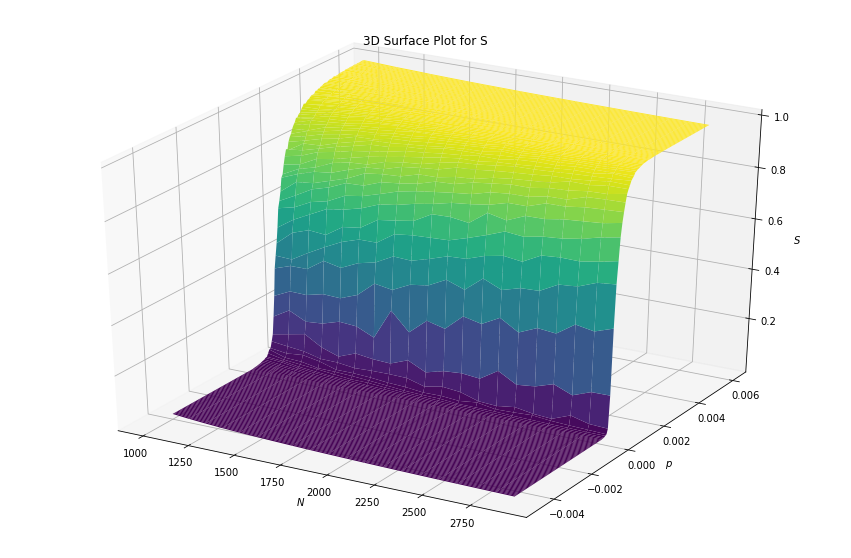

In [6]:
plt.clf()
fig=plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
X=np.array([np.array(xi) for xi in x])
Y=np.array([np.array(yi) for yi in y])
Z=np.array([np.array(zi) for zi in z])
Z2=np.array([np.array(zi) for zi in z2])
ax.plot_surface(Y, X, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Plot for S');
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$p$')
ax.set_zlabel(r'$S$');

In [0]:
from google.colab import files
import json

data = {}
data['X'] = X.tolist();
data['Y'] = Y.tolist();
data['Z'] = Z.tolist();
data['Z2'] = Z2.tolist();

with open('3d_surface_1000_3000.json', 'w') as json_file:
  json.dump(data, json_file)

files.download('3d_surface_1000_3000.json')

<Figure size 432x288 with 0 Axes>

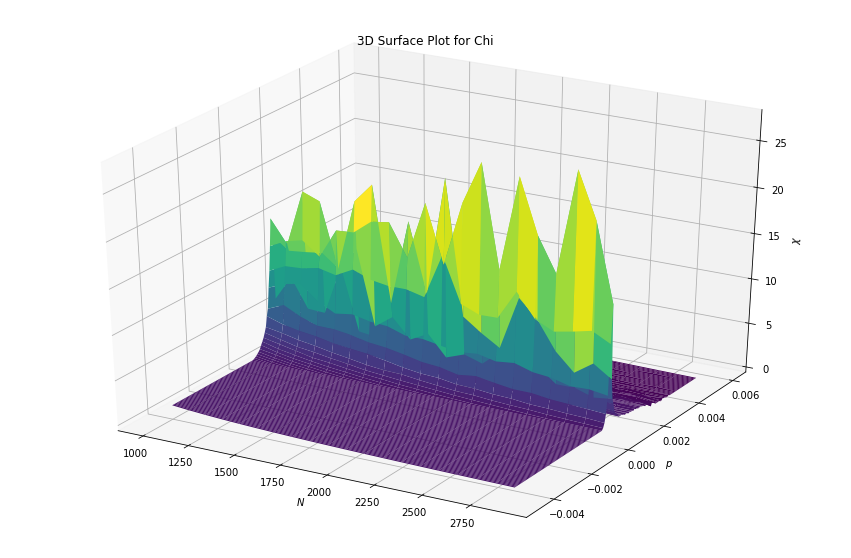

In [9]:
plt.clf()
fig=plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, Z2, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Plot for Chi');
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$p$')
ax.set_zlabel(r'$\chi$');